In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression


In [149]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

442 10
0.23135346442156982


Text(0, 0.5, 'Prediction')

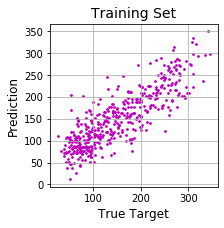

In [161]:
def gaussian(x, u, sigma):
    return (np.exp(-0.5*np.linalg.norm(x-u)/sigma))

N, p = X.shape
print(N, p)

# space for design matrix
M = 200
U = np.zeros((N, M))

C = np.random.randn(M, p)

X1 = X[np.floor(np.random.rand()*N).astype(int), :]
X2 = X[np.floor(np.random.rand()*N).astype(int), :]
sigma = np.linalg.norm(X1-X2)
print(sigma)
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)
        
#Pseudo inverse solution for linear part
l = np.linalg.inv(U.T @ U) @ U.T @ y
yh = U@l
fig, ax = plt.subplots(figsize=(3,3)) 
ax.scatter(y, yh, c='m', s=3) 
ax.grid(True)
ax.set_title("Training Set", fontsize=14) 
ax.set_xlabel("True Target", fontsize=12) 
ax.set_ylabel("Prediction", fontsize=12)

## 2.1 Normalize each feature of the input data to have a mean of 0 and standard deviation of 1.

In [120]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

## 2.2 The width parameter of the basis functions σ is set to be the distance between two randomly chosen points. Could this sometimes cause an error? Change it to be the average of several pairwise distances.

In [199]:
num_dist_sigma = 50
sigmas = []
for _ in range(num_dist_sigma):
    x1 = X[np.floor(np.random.rand()*N).astype(int),:]
    x2 = X[np.floor(np.random.rand()*N).astype(int),:]
    sigmas.append(np.linalg.norm(x1-x2))

sigma_many = np.mean(sigmas)
print(sigma_many)

0.2088465847511645


## 2.3 The locations of the M basis functions mj are set at random points in the input space. Cluster the data using K-means clustering (with K = M) and set the basis function loca- tions to the cluster centres.

In [163]:
# K-means cluster
from sklearn.cluster import KMeans

kmeans = KMeans(M)
kmeans.fit(X_scaled)
# the basis function locations 
C_kmeans = kmeans.cluster_centers_

## 2.4 Split the data into training and test sets, estimate the model on the training set and note the test set performance.

mean squared error on train set:  2319.6132274869346
mean squared error on test set:  171747183.816152


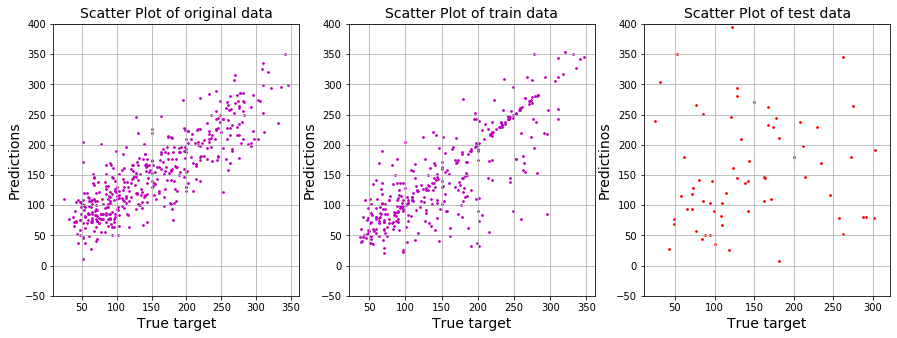

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
N_train, p_train = len(X_train), len(y_train)
N_test, p_test = len(X_test), len(y_test)

U_train = np.zeros((N_train,M))
for i in range(N_train):
    for j in range(M):
        U_train[i,j] = gaussian(X_train[i,:], C_kmeans[j,:], sigma_many)
        
l_train = np.linalg.inv(U_train.T @ U_train)@U_train.T@y_train
pred_train = U_train @ l_train
print("mean squared error on train set: ", mean_squared_error(y_train, pred_train))

U_test = np.zeros((N_test,M))
for i in range(N_test):
    for j in range(M):
        U_test[i,j] = gaussian(X_test[i,:], C_kmeans[j,:], sigma_many)
        
pred_test = U_test @ l_train
print("mean squared error on test set: ", mean_squared_error(y_test, pred_test))

fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].scatter(y, yh, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Scatter Plot of original data", fontsize=14)
ax[0].set_xlabel("True target", fontsize=14)
ax[0].set_ylabel("Predictions", fontsize=14)
ax[0].set_ylim(-50,400)

ax[1].scatter(y_train, pred_train, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Scatter Plot of train data", fontsize=14)
ax[1].set_xlabel("True target", fontsize=14)
ax[1].set_ylabel("Predictions", fontsize=14)
ax[1].set_ylim(-50,400)

ax[2].scatter(y_test, pred_test, c='r', s=3)
ax[2].grid(True)
ax[2].set_title("Scatter Plot of test data",fontsize=14)
ax[2].set_xlabel("True target", fontsize=14)
ax[2].set_ylabel("Predictinos", fontsize=14)
ax[2].set_ylim(-50,400)
plt.savefig('scatterplot_of_originalvsusingKMeans.png')


## 3. Implement ten-fold cross validation, where you split the data into ten parts, train on nine tenths of the data and test on the held out tenth set, repeating the process ten times.


mean squared error on train set: iteration 396 1336.786613373866
mean squared error on test set: iteration 44 48659.98580349685
mean squared error on train set: iteration 396 1538.4875967818953
mean squared error on test set: iteration 44 15196.92892949562
mean squared error on train set: iteration 397 1560.2729495959848
mean squared error on test set: iteration 43 14739.032823045913
mean squared error on train set: iteration 397 1486.9621015985665
mean squared error on test set: iteration 43 19750.238262258183
mean squared error on train set: iteration 397 1543.475355963233
mean squared error on test set: iteration 43 5530.33808090145
mean squared error on train set: iteration 397 1484.033704516044
mean squared error on test set: iteration 43 35249.53115815039
mean squared error on train set: iteration 397 1478.2998505679443
mean squared error on test set: iteration 43 11272.143056350584
mean squared error on train set: iteration 397 1564.9620428814462
mean squared error on test set: 

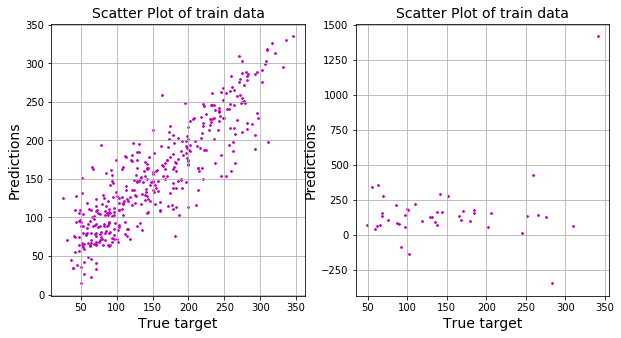

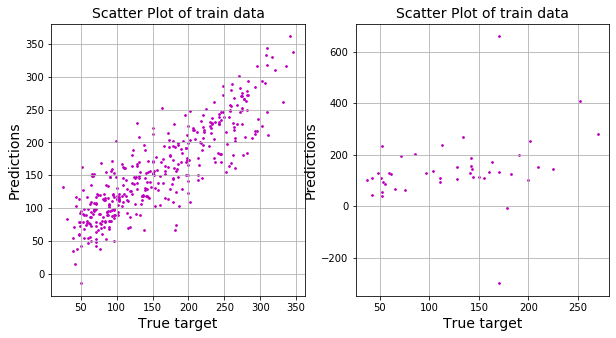

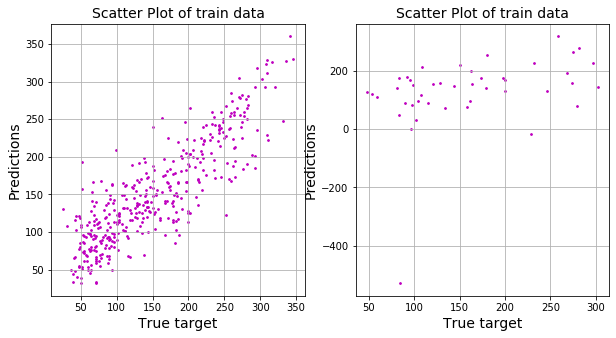

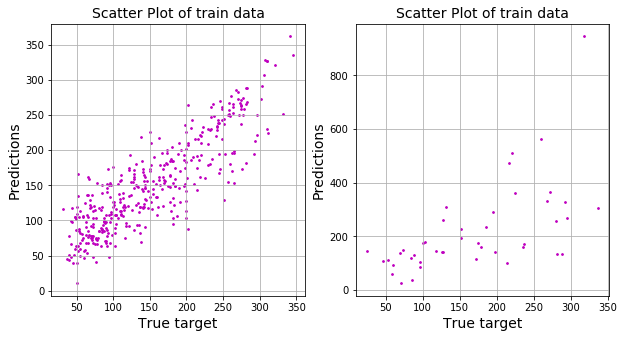

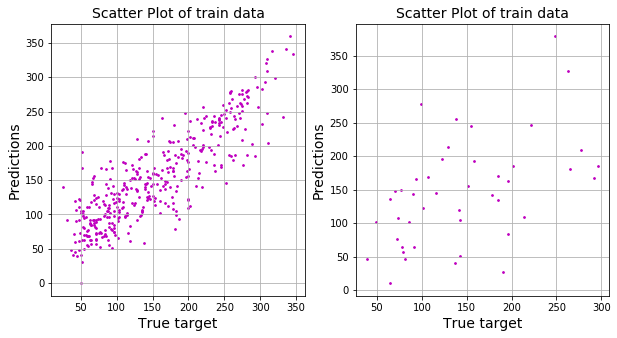

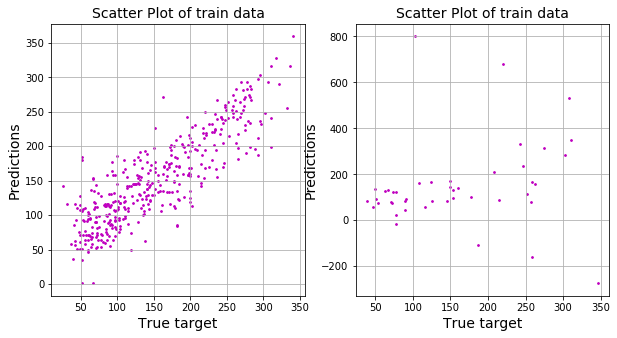

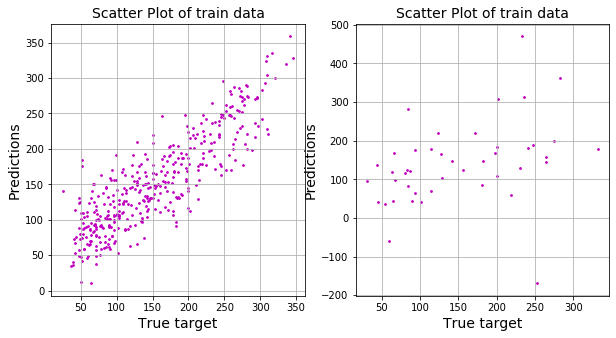

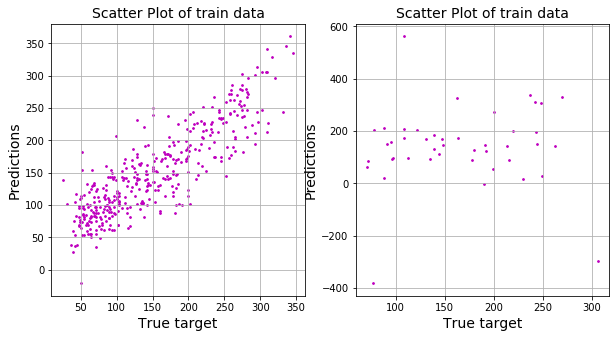

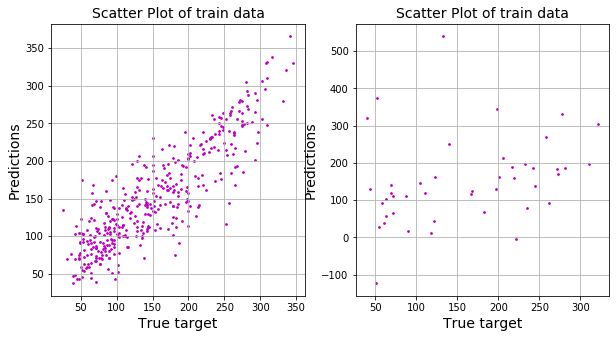

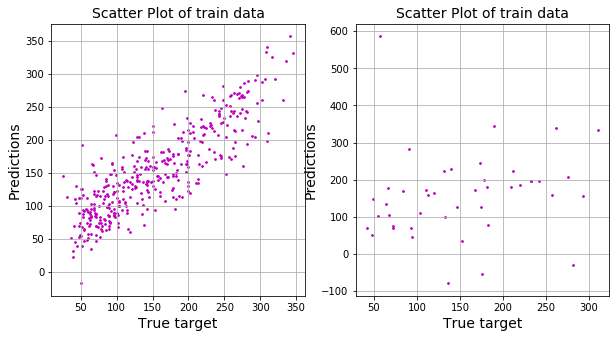

In [192]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
error_train = []
error_test = []
i = 0
for train_index, test_index in kf.split(X_scaled, y):
    i+=1
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    N_train, p_train = len(X_train), len(y_train)
    N_test, p_test = len(X_test), len(y_test)
    
    U_train = np.zeros((N_train,M))
    for i in range(N_train):
        for j in range(M):
            U_train[i,j] = gaussian(X_train[i,:], C_kmeans[j,:], sigma_many)

    l_train = np.linalg.inv(U_train.T @ U_train)@U_train.T@y_train
    pred_train = U_train @ l_train
    print("mean squared error on train set: iteration", i , mean_squared_error(y_train, pred_train))
    error_train.append(mean_squared_error(y_train, pred_train))
    U_test = np.zeros((N_test,M))
    for i in range(N_test):
        for j in range(M):
            U_test[i,j] = gaussian(X_test[i,:], C_kmeans[j,:], sigma_many)

    pred_test = U_test @ l_train
    print("mean squared error on test set: iteration", i , mean_squared_error(y_test, pred_test))
    error_test.append(mean_squared_error(y_test, pred_test))
    fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    ax[0].scatter(y_train, pred_train, c='m', s=3)
    ax[0].grid(True)
    ax[0].set_title("Scatter Plot of train data", fontsize=14)
    ax[0].set_xlabel("True target", fontsize=14)
    ax[0].set_ylabel("Predictions", fontsize=14)
#     ax[0].set_ylim(-50,400)

    ax[1].scatter(y_test, pred_test, c='m', s=3)
    ax[1].grid(True)
    ax[1].set_title("Scatter Plot of train data", fontsize=14)
    ax[1].set_xlabel("True target", fontsize=14)
    ax[1].set_ylabel("Predictions", fontsize=14)
#     ax[1].set_ylim(-50,400)
print("mean squared error on train set: ", np.mean(error_train))
print("mean squared error on test set: ", np.mean(error_test))


## 4. Display the distributions of test set results for the RBF and Linear Regression Models as boxplots side by side.


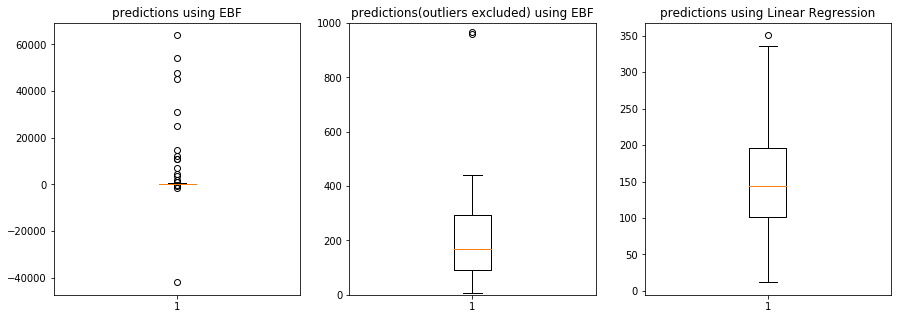

In [188]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].boxplot(pred_test)
ax[0].set_title("predictions using EBF")
ax[1].boxplot(pred_test)
ax[1].set_ylim(0,1000)
ax[1].set_title("predictions(outliers excluded) using EBF")
ax[2].boxplot(yh)
ax[2].set_title("predictions using Linear Regression")
plt.savefig("boxplots of RBF and Linear Regression.png")

## 5. Compare your implementations with sklearn’s inbuilt RBF model.

mean sqared error of test data using self-implemented alg:  15565.911933128791
mean sqared error of test data using RBF form sklearn:  24830.86773043692


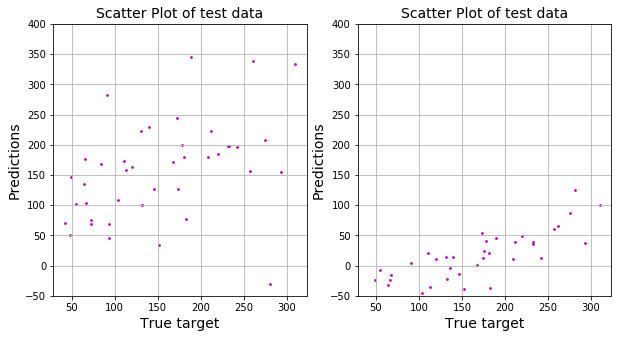

In [197]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.kernel_ridge import KernelRidge
# kernel = 1.0 * RBF(1.0)
# gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X, y)
# gpc.score(X, y)
clf = KernelRidge(0.1)
clf.fit(X_train,y_train)
pred_train_sk = clf.predict(X_train)
pred_test_sk = clf.predict(X_test)
print("mean sqared error of test data using self-implemented alg: ", mean_squared_error(y_test, pred_test))
print("mean sqared error of test data using RBF form sklearn: ", mean_squared_error(y_test, pred_test_sk))
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(y_test, pred_test, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Scatter Plot of test data", fontsize=14)
ax[0].set_xlabel("True target", fontsize=14)
ax[0].set_ylabel("Predictions", fontsize=14)
ax[0].set_ylim(-50,400)

ax[1].scatter(y_test, pred_test_sk, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Scatter Plot of test data", fontsize=14)
ax[1].set_xlabel("True target", fontsize=14)
ax[1].set_ylabel("Predictions", fontsize=14)
ax[1].set_ylim(-50,400)
plt.savefig('mseOfTestDataUsingSelf-implementedAlgAndRBFFromSklearn.png')